In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_excel("Kerly Analysis/Ventas.xlsx")
df.head()            # Primeras 5 filas
df.shape             # Filas y columnas
df.info()            # Tipos de datos y nulos
df.describe()        # Estadísticas numéricas básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                1747 non-null   int64  
 1   FACTURA_ID       1747 non-null   int64  
 2   FECHA            1747 non-null   object 
 3   ESTABLECIMIENTO  1747 non-null   object 
 4   CATEGORIA        1747 non-null   object 
 5   CODIGO           1747 non-null   object 
 6   AGRUPAR_POR      1747 non-null   object 
 7   COLOR            0 non-null      float64
 8   TALLA            0 non-null      float64
 9   TIPO             1747 non-null   object 
 10  IMPUESTO         1747 non-null   object 
 11  TIPO_DE_PAGO     1747 non-null   int64  
 12  FORMA_DE_PAGO    1747 non-null   int64  
 13  SERIE            1747 non-null   object 
 14  NUMERO           1747 non-null   int64  
 15  SERIE_FEL        228 non-null    object 
 16  NUMERO_FEL       228 non-null    float64
 17  NIT           

,#,FACTURA_ID,COLOR,TALLA,TIPO_DE_PAGO,FORMA_DE_PAGO,NUMERO,NUMERO_FEL,PACIENTE,CANTIDAD,COSTO,COSTO TOTAL,DESCUENTO,TOTAL,UTILIDAD
count,1747.000000,1747.000000,0.0,0.0,1747.0,1747.0,1747.000000,2.280000e+02,0.0,1747.000000,0.0,0.0,1747.000000,1747.000000,1747.000000
mean,874.000000,788715.600458,NaN,NaN,0.0,0.0,649.849456,2.032260e+09,NaN,1.677733,NaN,NaN,33.884242,1063.524986,641.073309
std,504.459777,260917.092333,NaN,NaN,0.0,0.0,293.649930,1.222177e+09,NaN,1.602469,NaN,NaN,185.741737,2528.809373,1738.073193
min,1.000000,60040.000000,NaN,NaN,0.0,0.0,9.000000,1.574618e+07,NaN,1.000000,NaN,NaN,0.000000,0.000000,-599.000000
25%,437.500000,799808.500000,NaN,NaN,0.0,0.0,446.500000,8.808890e+08,NaN,1.000000,NaN,NaN,0.000000,7.000000,5.000000
50%,874.000000,907129.000000,NaN,NaN,0.0,0.0,683.000000,1.998014e+09,NaN,1.000000,NaN,NaN,0.000000,28.000000,20.000000
75%,1310.500000,947905.000000,NaN,NaN,0.0,0.0,888.000000,3.004122e+09,NaN,2.000000,NaN,NaN,0.000000,400.000000,179.000000
max,1747.000000,984043.000000,NaN,NaN,0.0,0.0,1122.000000,4.238100e+09,NaN,15.000000,NaN,NaN,2650.000000,33000.000000,33000.000000


In [55]:
df.isnull().sum()        # Conteo de nulos por columna
df.duplicated().sum()    # Conteo de duplicados

0

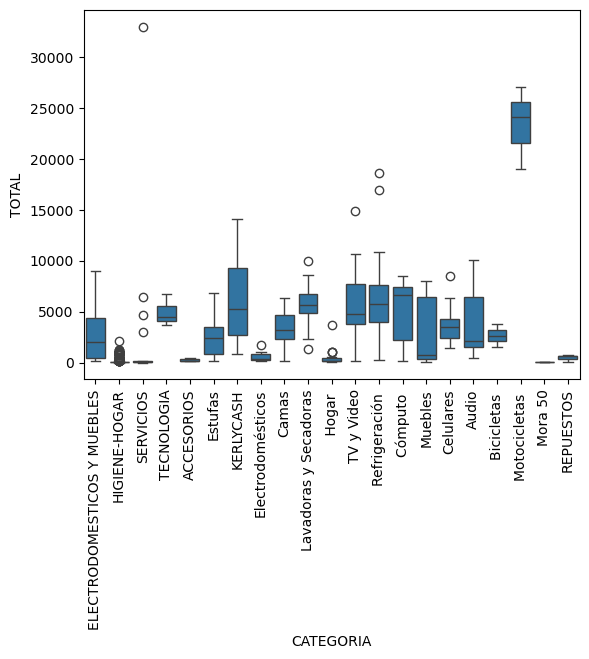

<Axes: xlabel='TIPO', ylabel='UTILIDAD'>

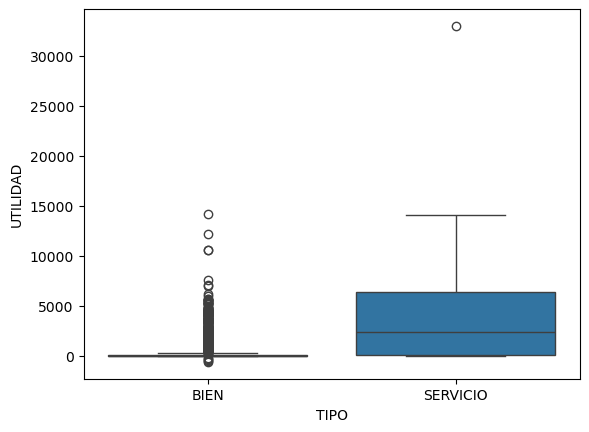

In [67]:
sns.boxplot(x='CATEGORIA', y='TOTAL', data=df)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='TIPO', y='UTILIDAD', data=df)

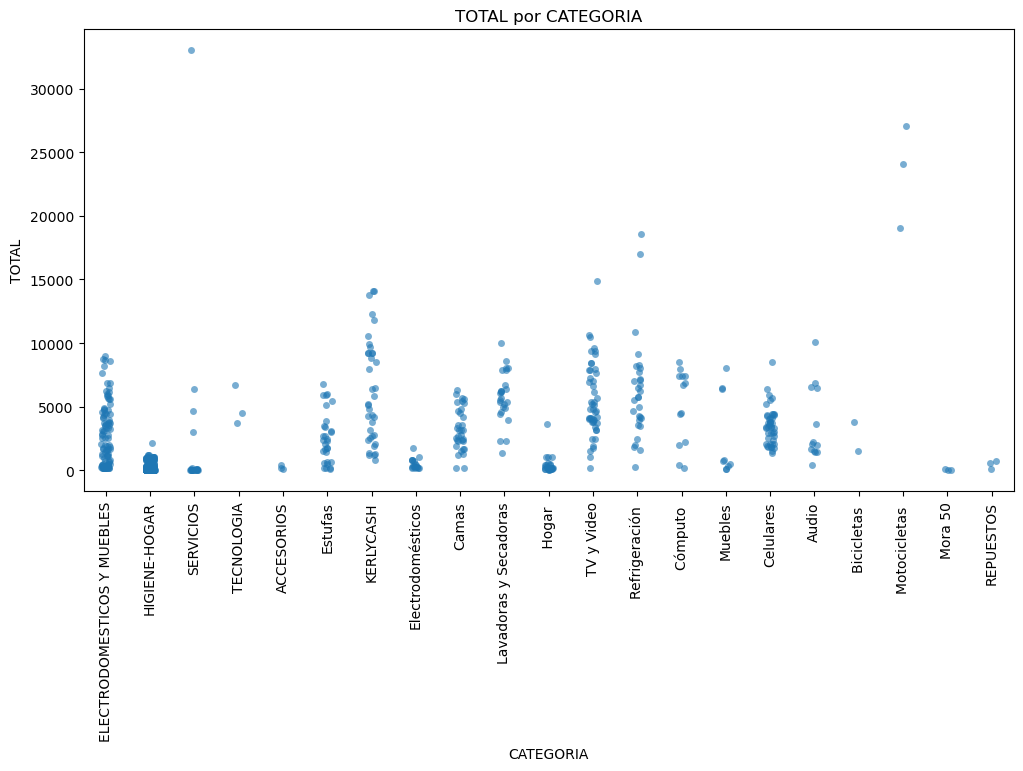

In [76]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='CATEGORIA', y='TOTAL', data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=90)
plt.title('TOTAL por CATEGORIA')
plt.show()

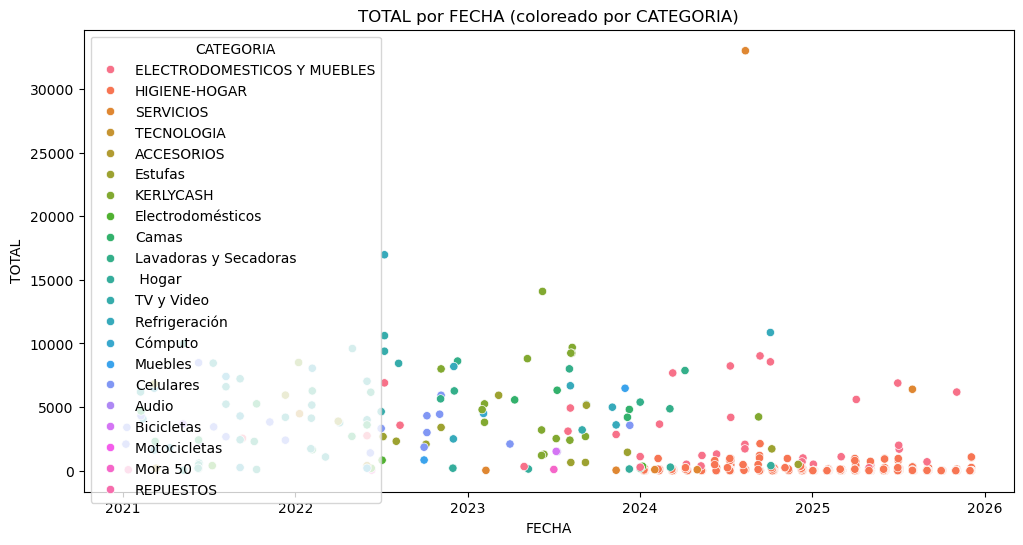

In [78]:
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FECHA', y='TOTAL', hue='CATEGORIA', data=df)
plt.title('TOTAL por FECHA (coloreado por CATEGORIA)')
plt.show()

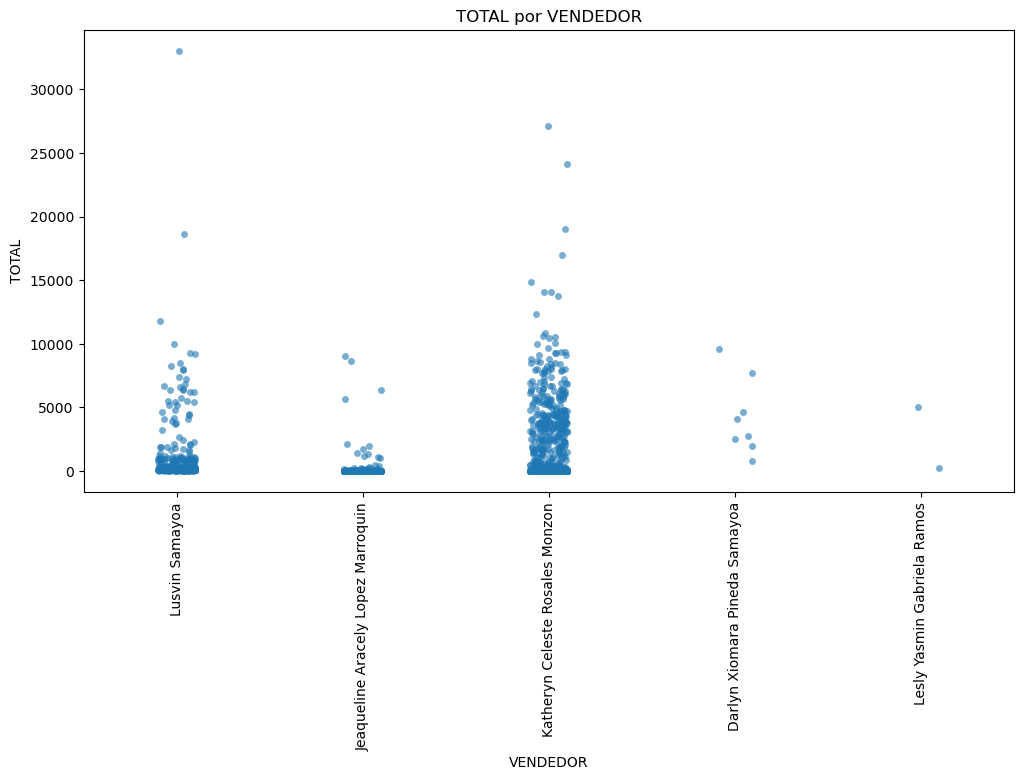

In [80]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='VENDEDOR', y='TOTAL', data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=90)
plt.title('TOTAL por VENDEDOR')
plt.show()

In [82]:
# Agrupar por fecha y sumar total
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['MES'] = df['FECHA'].dt.month

ventas_mayo = df[df['MES'] == 5]
ventas_mayo.groupby('CATEGORIA')['TOTAL'].sum().sort_values(ascending=False)

CATEGORIA
Lavadoras y Secadoras          9984.00000
TV y Video                     9600.00000
KERLYCASH                      8805.76677
Audio                          3672.00000
ELECTRODOMESTICOS Y MUEBLES    3143.00000
HIGIENE-HOGAR                  2837.00000
Camas                          2700.00000
 Hogar                          175.00000
SERVICIOS                        81.00000
Name: TOTAL, dtype: float64